In [4]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl,plt
import yfinance as yf
from itertools import product

<b> Understanding statistical models and traditional frameworks for stock price assesment </b>

<b> Testing SMA strategy in two seperate market conditions </b>

<b> SCENARIO 1 (2010-2018 stock data) </b>

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'AAPL Closing Prices'}, xlabel='Date'>

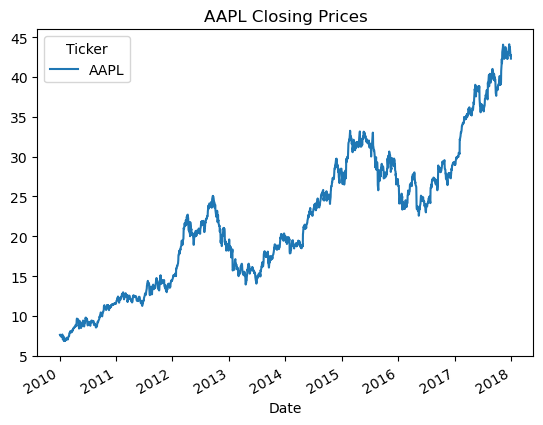

In [9]:
#optimization
#brute force approach-repeat the whole vectorized backtesting for different parameter combinations, rank,

symbol='AAPL.O'

#Simple Moving Averages
data = yf.download("AAPL", start="2010-01-01", end="2018-01-01")
data['Close'].plot(title='AAPL Closing Prices')

C:\Users\Ira bajpai\AppData\Local\Temp\ipykernel_26740\1668949453.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['Close'].resample('M').mean()


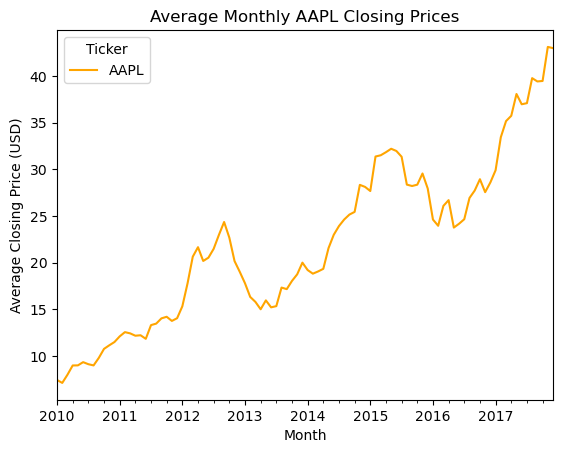

In [10]:
# Calculate the average monthly stock price
monthly_avg = data['Close'].resample('M').mean()

# Plot the average monthly stock prices
monthly_avg.plot(title='Average Monthly AAPL Closing Prices', color='orange')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.show()

In [12]:
# Calculate the average monthly stock price
monthly_avg = data['Close'].resample('ME').mean()


In [15]:
import pandas as pd
import numpy as np
from itertools import product

# Parameters for SMA ranges
sma1 = range(10, 50, 5)  # Short range
sma2 = range(150, 282, 4)  # Long range

results = pd.DataFrame()

for SMA1, SMA2 in product(sma1, sma2):
    data2 = pd.DataFrame()
    data2['Close'] = data['Close']  # Assuming `data['Close']` contains closing prices
    data2.dropna(inplace=True)
    
    # Calculate log returns
    data2['Returns'] = np.log(data2['Close'] / data2['Close'].shift(1))
    
    # Calculate SMAs
    data2['SMA1'] = data2['Close'].rolling(SMA1).mean()
    data2['SMA2'] = data2['Close'].rolling(SMA2).mean()
    data2.dropna(inplace=True)
    
    # Generate positions
    data2['Position'] = np.where(data2['SMA1'] > data2['SMA2'], 1, -1)
    
    # Calculate strategy returns
    data2['Strategy'] = data2['Position'].shift(1) * data2['Returns']
    
    # Performance metrics
    perf = np.exp(data2[['Returns', 'Strategy']].sum())  # Total performance
    
    # Additional evaluations
    strategy_cum_returns = data2['Strategy'].cumsum()
    market_cum_returns = data2['Returns'].cumsum()
    # Win Rate
    winning_trades = data2.loc[data2['Strategy'] > 0, 'Strategy']
    win_rate = len(winning_trades) / len(data2['Strategy'].dropna())
    
    # Append results to the DataFrame
    results = results._append(pd.DataFrame({
        'SMA1': SMA1,
        'SMA2': SMA2,
        'Returns': perf['Returns'],
        'Strategy Returns': perf['Strategy'],
        'OUT': perf['Strategy'] - perf['Returns'],
        'WIN_RATE': win_rate
    }, index=[0]), ignore_index=True)

# Sort results by Strategy performance for analysis
results.sort_values(by='Strategy Returns', ascending=False, inplace=True)

# Display top strategies
print(results.head())


     SMA1  SMA2   Returns  Strategy Returns       OUT  WIN_RATE
235    45   166  4.902781          8.031570  3.128789  0.528424
236    45   170  4.697664          7.297782  2.600118  0.526316
234    45   162  4.819406          7.294353  2.474947  0.528363
237    45   174  4.503022          6.963488  2.460466  0.525285
5      10   170  4.697664          6.763836  2.066171  0.527401


In [16]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,Returns,Strategy Returns,OUT,WIN_RATE
235,45,166,4.902781,8.031570,3.128789,0.528424
236,45,170,4.697664,7.297782,2.600118,0.526316
206,40,182,4.174543,6.669872,2.495330,0.525396
234,45,162,4.819406,7.294353,2.474947,0.528363
237,45,174,4.503022,6.963488,2.460466,0.525285
208,40,190,4.193013,6.559522,2.366510,0.524410
207,40,186,4.068588,6.358027,2.289439,0.523810


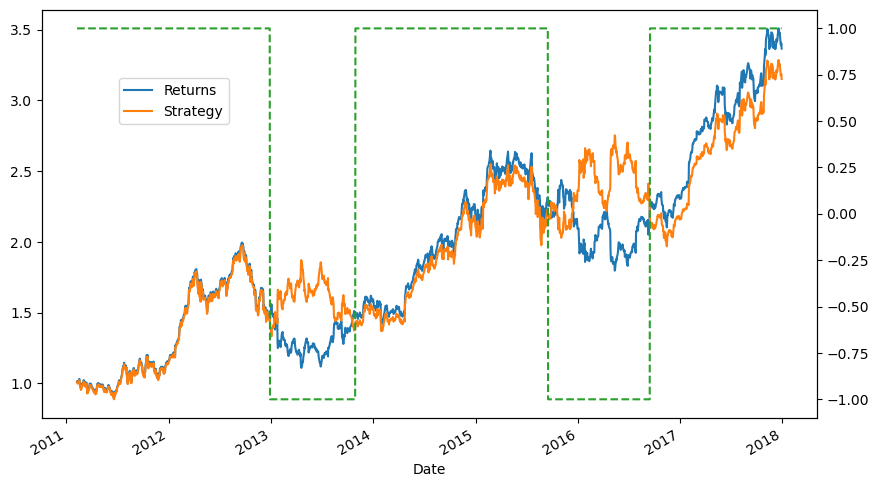

In [17]:
ax=data2[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
data2['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85));
plt.show()

<b> The period from 2010-2018 featured strong upward trends, which allowed the strategy to capitalize on steady momentum. </b>

<b> SCENARIO 2 (2018-2024) STOCK DATA

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'AAPL Closing Prices'}, xlabel='Date'>

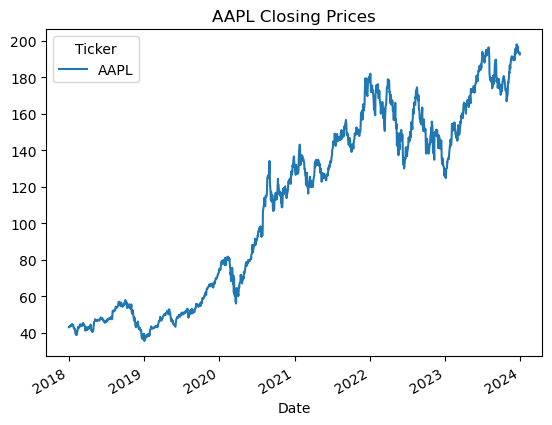

In [815]:
symbol='AAPL.O'

#Simple Moving Averages
data = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
data['Close'].plot(title='AAPL Closing Prices')

In [817]:
import pandas as pd
import numpy as np
from itertools import product

# SMA ranges for short and long windows
sma1 = range(10, 50, 5)  # Short range
#sma2 = range(200, 400, 6)  # Long range
sma2=range(150,282,4)

# Initialize results DataFrame
results = pd.DataFrame()

for SMA1, SMA2 in product(sma1, sma2):
    data2 = pd.DataFrame()
    data2['Close'] = data['Close']  # Assuming `data['Close']` contains closing prices
    data2.dropna(inplace=True)
    
    # Calculate log returns
    data2['Returns'] = np.log(data2['Close'] / data2['Close'].shift(1))
    
    # Calculate SMAs
    data2['SMA1'] = data2['Close'].rolling(SMA1).mean()
    data2['SMA2'] = data2['Close'].rolling(SMA2).mean()
    data2.dropna(inplace=True)
    
    # Generate positions
    data2['Position'] = np.where(data2['SMA1'] > data2['SMA2'], 1, -1)
    
    # Calculate strategy returns
    data2['Strategy'] = data2['Position'].shift(1) * data2['Returns']
    
    # Performance metrics
    perf = np.exp(data2[['Returns', 'Strategy']].sum())  # Total performance
    
    # Additional evaluations
    strategy_cum_returns = data2['Strategy'].cumsum()
    market_cum_returns = data2['Returns'].cumsum()
    
    
    # Win Rate
    winning_trades = data2.loc[data2['Strategy'] > 0, 'Strategy']
    win_rate = len(winning_trades) / len(data2['Strategy'].dropna())
    
    # Append results to the DataFrame
    results = results._append(pd.DataFrame({
        'SMA1': SMA1,
        'SMA2': SMA2,
        'MARKET': perf['Returns'],
        'STRATEGY': perf['Strategy'],
        'OUT': perf['Strategy'] - perf['Returns'],


        'WIN_RATE': win_rate
    }, index=[0]), ignore_index=True)

# Sort results by Strategy performance for analysis
results.sort_values(by='STRATEGY', ascending=False, inplace=True)

# Display top strategies
print(results.head())


    SMA1  SMA2    MARKET  STRATEGY       OUT  WIN_RATE
31    10   274  4.624790  2.819033 -1.805757  0.517409
32    10   278  4.505206  2.560928 -1.944278  0.515841
18    10   222  4.122698  2.370031 -1.752667  0.512821
54    15   234  4.166865  2.345947 -1.820918  0.515294
27    10   258  5.023286  2.340360 -2.682926  0.515588


In [818]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT,WIN_RATE
17,10,218,3.693798,2.332170,-1.361628,0.512781
13,10,202,3.481712,2.095762,-1.385950,0.515685
14,10,206,3.457639,2.057961,-1.399678,0.514198
16,10,214,3.711780,2.214686,-1.497094,0.514286
12,10,198,3.591140,2.083471,-1.507669,0.515637
143,30,194,3.433591,1.921799,-1.511791,0.511027
139,30,178,3.401440,1.875934,-1.525506,0.510143


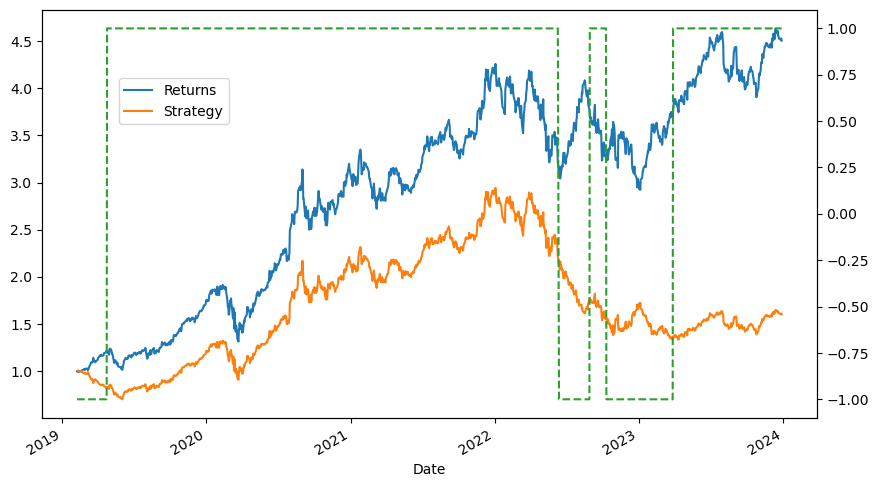

In [821]:
ax=data2[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
data2['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85));
plt.show()

<p> The same strategy doesn't perfom well for a different time range as other factors affect the market, however the strategy
performance is slighltily increased when using different rolling windows, specifiacally using a 200-400 window,
These windows smooth out short-term noise and volatility, making them ideal for identifying long-term trends. </p>

<b> Second Strategy : 
The second strategy involves performing RWH (Random Walk Hypothesis). A financial time series of historical market prices is used to create multiple lagged versions. Then, OLS regression is applied to predict the current market price based on these lagged prices. The core idea is that market prices from 4 days prior can be used to forecast today’s market price. </b>

<b> Analysis for 2010-2018 Time Period </b>

In [329]:
data = yf.download("AAPL", start="2010-01-01", end="2018-01-01")
data=data.reset_index()
data=pd.DataFrame(data[['Date','Adj Close','Close','High',	'Low','Open','Volume']])

[*********************100%***********************]  1 of 1 completed


<Axes: >

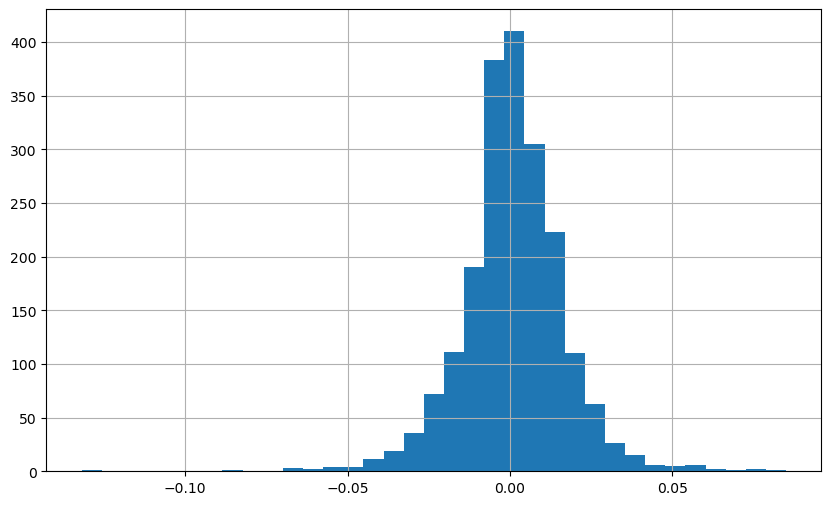

In [331]:
data['returns']=np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
data['direction']=np.sign(data['returns']).astype(int)
data['returns'].hist(bins=35, figsize=(10, 6))

In [333]:
#creating the features data by lagging the log returns and visualizes it in combination
lags=5 #increasing the lag to 10 led to better results for Return based OLS Regression
def create_lags(data):
    global cols
    cols= []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [335]:
create_lags(data)
data.dropna(inplace=True)

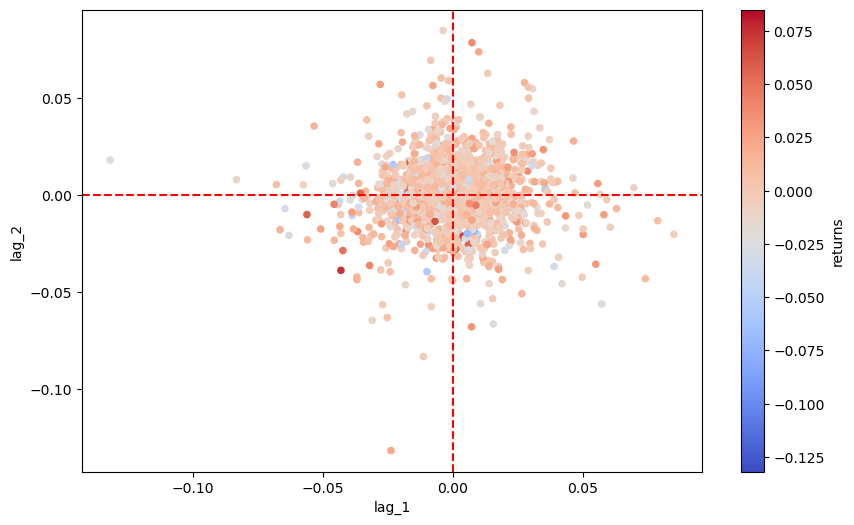

In [337]:
data.plot.scatter(x='lag_1',y='lag_2',c='returns',cmap='coolwarm',figsize=(10,6),colorbar=True)
plt.axvline(0,c='r',ls='--')
plt.axhline(0,c='r',ls='--')

In [338]:
#Once the dataset is complete, OLS regression can be used to identify potential linear relationships for predicting market movement based on the features. 
#This can then be used to backtest a trading strategy using the predictions.
from sklearn.linear_model import LinearRegression

In [341]:
split = int(len(data) * 0.7) #sequential spit
train = data.iloc[:split].copy() 
test = data.iloc[split:].copy()

In [343]:
model= LinearRegression()

In [345]:
# 1. Predict returns (pos_ols_1) on sequential split
model.fit(train[cols], train['returns'])  # Train the model
test['pos_ols_1'] = model.predict(test[cols])  # Predict on test set

In [347]:
# 2. Predict direction (pos_ols_2) on sequential split
model.fit(train[cols], train['direction'])  # Train the model
test['pos_ols_2'] = model.predict(test[cols])  # Predict on test set

In [349]:
test[['pos_ols_1','pos_ols_2']]=np.where(test[['pos_ols_1','pos_ols_2']]>0,1,-1)
test['pos_ols_1'].value_counts()

pos_ols_1
 1    511
-1     92
Name: count, dtype: int64

In [351]:
test['pos_ols_2'].value_counts()

pos_ols_2
 1    538
-1     65
Name: count, dtype: int64

In [353]:
(test['pos_ols_1'].diff() !=0).sum()

179

In [355]:
(test['pos_ols_2'].diff() !=0 ).sum()

105

In [357]:

#vectorized backtesting
test['Returns Based Strategy Returns']=test['pos_ols_1']*test['returns']
test['Market Direction Based Strategy Returns']=test['pos_ols_2']*test['returns']
test[['returns','Returns Based Strategy Returns','Market Direction Based Strategy Returns']].sum().apply(np.exp)


Price                                    Ticker
returns                                            1.413548
Returns Based Strategy Returns                     1.307804
Market Direction Based Strategy Returns            1.187079
dtype: float64

In [359]:
(test['direction']==test['pos_ols_1']).value_counts() #shows number of correct predictions by the strategy


True     312
False    291
Name: count, dtype: int64

In [361]:
(test['direction']==test['pos_ols_2']).value_counts()


True     313
False    290
Name: count, dtype: int64

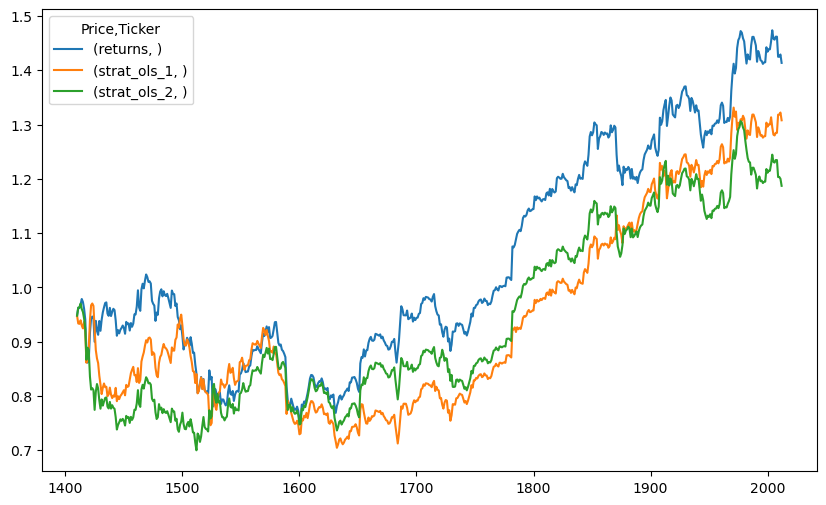

In [215]:
test[['returns','strat_ols_1','strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10,6));

<b> for the 2010-2018 period, both strategies underperform as compared to the market returns, when used with a 5-day lag.
However, when a 10-day lag is used instead of 5-days, the Returns Based OLS regression strategy improves in performance </b>

<b> Analysis for 2018-2024 data </b>

In [829]:
data = yf.download("AAPL", start="2010-01-01", end="2024-01-01")
data=data.reset_index()
data=pd.DataFrame(data[['Date','Adj Close','Close','High',	'Low','Open','Volume']])

[*********************100%***********************]  1 of 1 completed


<Axes: >

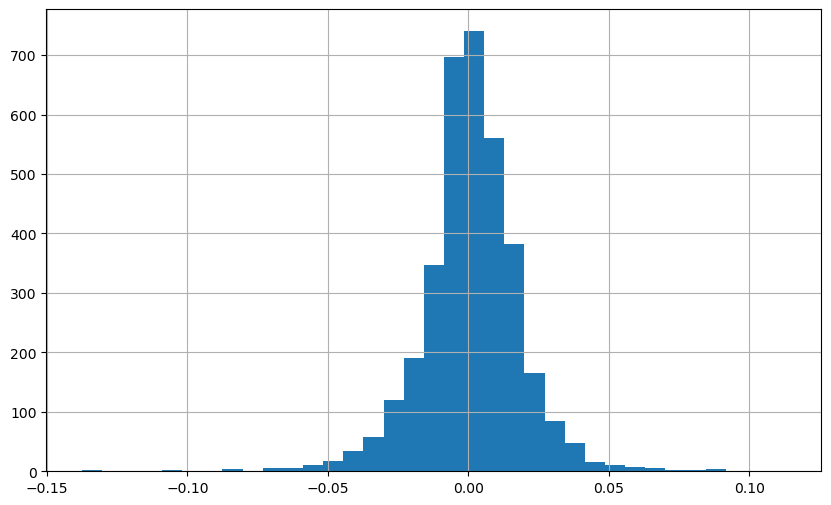

In [831]:
data['returns']=np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
data['direction']=np.sign(data['returns']).astype(int)
data['returns'].hist(bins=35, figsize=(10, 6))

In [833]:
#creating the features data by lagging the log returns and visualizes it in combination
lags=5
def create_lags(data):
    global cols
    cols= []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [835]:
create_lags(data)

In [837]:
data.dropna(inplace=True)

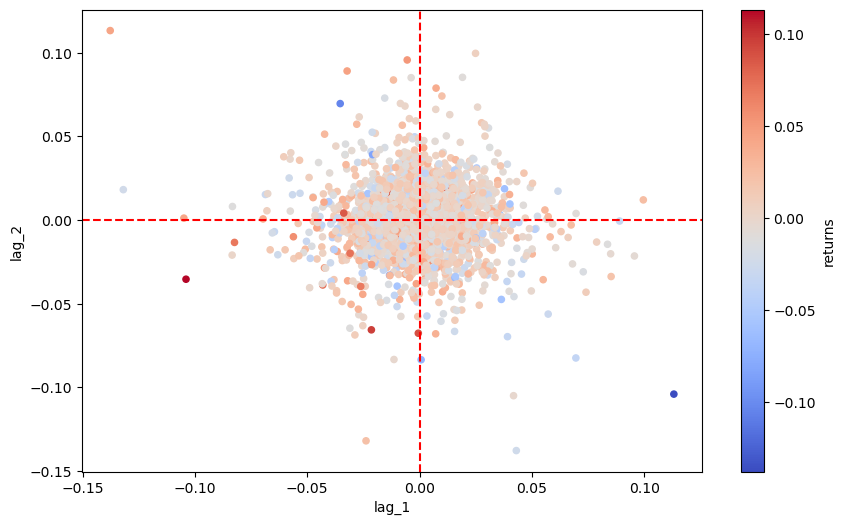

In [839]:
data.plot.scatter(x='lag_1',y='lag_2',c='returns',cmap='coolwarm',figsize=(10,6),colorbar=True)
plt.axvline(0,c='r',ls='--')
plt.axhline(0,c='r',ls='--')

In [843]:
split = int(len(data) * 0.7) #sequential spit
train = data.iloc[:split].copy() 
test = data.iloc[split:].copy()

In [845]:
model= LinearRegression()

In [847]:
# 1. Predict returns (pos_ols_1) on sequential split
model.fit(train[cols], train['returns'])  # Train the model
test['pos_ols_1'] = model.predict(test[cols])  # Predict on test set

In [849]:
# 2. Predict direction (pos_ols_2) on sequential split
model.fit(train[cols], train['direction'])  # Train the model
test['pos_ols_2'] = model.predict(test[cols])  # Predict on test set

In [851]:
test[['pos_ols_1','pos_ols_2']].head()

Price,pos_ols_1,pos_ols_2
Ticker,,
2467,0.000934,0.044539
2468,0.000591,0.080574
2469,0.000605,0.051697
2470,0.001057,0.104084
2471,0.000202,0.062043


In [853]:
test[['pos_ols_1','pos_ols_2']]=np.where(test[['pos_ols_1','pos_ols_2']]>0,1,-1)

In [855]:
test['pos_ols_1'].value_counts()

pos_ols_1
 1    862
-1    193
Name: count, dtype: int64

In [857]:
test['pos_ols_2'].value_counts()

pos_ols_2
 1    946
-1    109
Name: count, dtype: int64

In [859]:
(test['pos_ols_1'].diff() !=0).sum()

355

In [861]:
(test['pos_ols_2'].diff() !=0 ).sum()

181

In [863]:

#vectorized backtesting
test['Returns Based Strategy']=test['pos_ols_1']*test['returns']
test['Market Diection Based Stretgy']=test['pos_ols_2']*test['returns']


In [865]:
test[['returns','Returns Based Strategy','Market Diection Based Stretgy']].sum().apply(np.exp)

Price                          Ticker
returns                                  3.202029
Returns Based Strategy                   2.826785
Market Diection Based Stretgy            3.225492
dtype: float64

In [867]:
(test['direction']==test['pos_ols_1']).value_counts() #shows number of correct predictions by the strategy

True     563
False    492
Name: count, dtype: int64

In [869]:
(test['direction']==test['pos_ols_2']).value_counts()

True     550
False    505
Name: count, dtype: int64

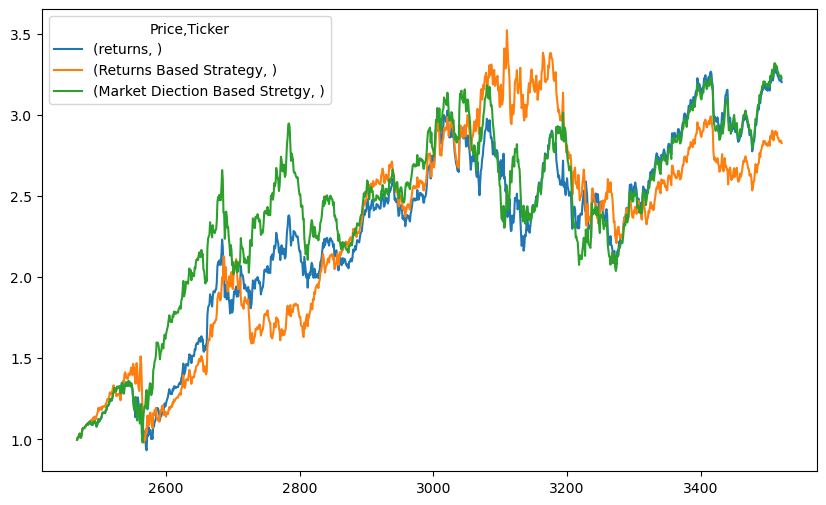

In [871]:
test[['returns','Returns Based Strategy','Market Diection Based Stretgy']].cumsum().apply(np.exp).plot(figsize=(10,6));

<b>The 2018-2024 window yields better results for RWH based, OLS regression strategies
However the analysis is working on the assumption that there is "zero cost of transaction" </b>

<b> Third Strategy: The frequency approach simplifies market predictions by converting continuous data into binary outcomes (0 or 1).
Each pair of binary values (e.g., (0,0), (0,1)) represents a specific market scenario. By calculating the probability of upward or downward movement 
for each scenario using historical data, it offers a simple probabilistic framework for predicting market direction, without the need for complex models.</b>

<b> Analysis for 2010-2018 data </b> 

In [875]:
data = yf.download("AAPL", start="2010-01-01", end="2018-01-01")
data=data.reset_index()
data=pd.DataFrame(data[['Date','Adj Close','Close','High',	'Low','Open','Volume']])

[*********************100%***********************]  1 of 1 completed


In [877]:
data['returns']=np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
data['direction']=np.sign(data['returns']).astype(int)


In [879]:
#creating the features data by lagging the log returns and visualizes it in combination
lags=5
def create_lags(data):
    global cols
    cols= []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [881]:
create_lags(data)

In [883]:
data.dropna(inplace=True)

In [888]:
def create_bins(data, bins=[0]): #creating bins
 global cols_bin
 cols_bin = []
 for col in cols:
     col_bin = col + '_bin'
     data[col_bin] = np.digitize(data[col], bins=bins) #digitizes
     cols_bin.append(col_bin)

In [890]:
create_bins(data)

In [892]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size() #Shows the frequency of the possible movements conditional on the feature valuecombinations

lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin  direction
0          0          0          0          0          -1            8
                                                        1           24
                                            1          -1           24
                                                        1           33
                                 1          0          -1           27
                                                                    ..
1          1          1          0          1           1           44
                                 1          0          -1           32
                                                        1           37
                                            1          -1           37
                                                        1           51
Length: 67, dtype: int64

In [894]:
res = grouped['direction'].size().unstack(fill_value=0) #Transforms the DataFrame object to have the frequencies in columns.

In [896]:
def highlight_max(s):
 is_max = s == s.max()
 return ['background-color: yellow' if v else '' for v in is_max] #Highlights the highest-frequency value per feature value combination

In [898]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1) #Translates the findings given the frequencies to a trading strategy.

In [900]:
(data['direction'] == data['pos_freq']).value_counts()

True     1064
False     943
Name: count, dtype: int64

In [902]:
data['Frequency Strategy'] = data['pos_freq'] * data['returns']
data[['returns', 'Frequency Strategy']].sum().apply(np.exp)

Price               Ticker
returns                       5.638046
Frequency Strategy            7.425545
dtype: float64

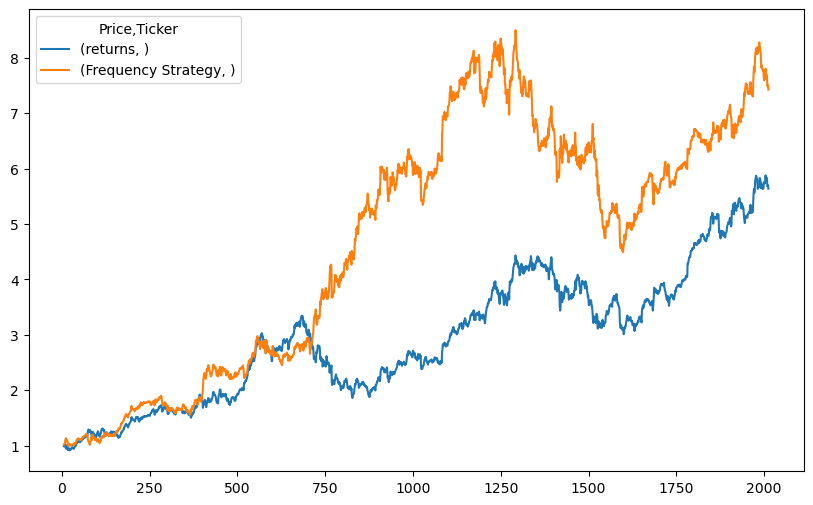

In [904]:
data[['returns', 'Frequency Strategy']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6));
#Given the frequency data, three feature value combinations hint at a downward
#movement while one lets an upward movement seem more likely.

<b> Frequency Strategy Outperforms the MarketReturns for 2010-2018 period </b>

<b> Analysis for 2018-2024 data </b>

In [912]:
data = yf.download("AAPL", start="2010-01-01", end="2018-01-01")
data=data.reset_index()
data=pd.DataFrame(data[['Date','Adj Close','Close','High',	'Low','Open','Volume']])

[*********************100%***********************]  1 of 1 completed


In [914]:
data['returns']=np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
data['direction']=np.sign(data['returns']).astype(int)

In [916]:
#creating the features data by lagging the log returns and visualizes it in combination
lags=5
def create_lags(data):
    global cols
    cols= []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [918]:
create_lags(data)

In [920]:
data.dropna(inplace=True)

In [922]:
def create_bins(data, bins=[0]): #creating bins
 global cols_bin
 cols_bin = []
 for col in cols:
     col_bin = col + '_bin'
     data[col_bin] = np.digitize(data[col], bins=bins) #digitizes
     cols_bin.append(col_bin)

In [924]:
create_bins(data)

In [926]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size() #Shows the frequency of the possible movements conditional on the feature valuecombinations

lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin  direction
0          0          0          0          0          -1            8
                                                        1           24
                                            1          -1           24
                                                        1           33
                                 1          0          -1           27
                                                                    ..
1          1          1          0          1           1           44
                                 1          0          -1           32
                                                        1           37
                                            1          -1           37
                                                        1           51
Length: 67, dtype: int64

In [928]:
res = grouped['direction'].size().unstack(fill_value=0) #Transforms the DataFrame object to have the frequencies in columns.

In [930]:
def highlight_max(s):
 is_max = s == s.max()
 return ['background-color: yellow' if v else '' for v in is_max] #Highlights the highest-frequency value per feature value combination

In [932]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1) #Translates the findings given the frequencies to a trading strategy.

In [934]:
(data['direction'] == data['pos_freq']).value_counts()

True     1064
False     943
Name: count, dtype: int64

In [936]:
data['Frequency Strategy'] = data['pos_freq'] * data['returns']
data[['returns', 'Frequency Strategy']].sum().apply(np.exp)

Price               Ticker
returns                       5.638046
Frequency Strategy            7.425545
dtype: float64

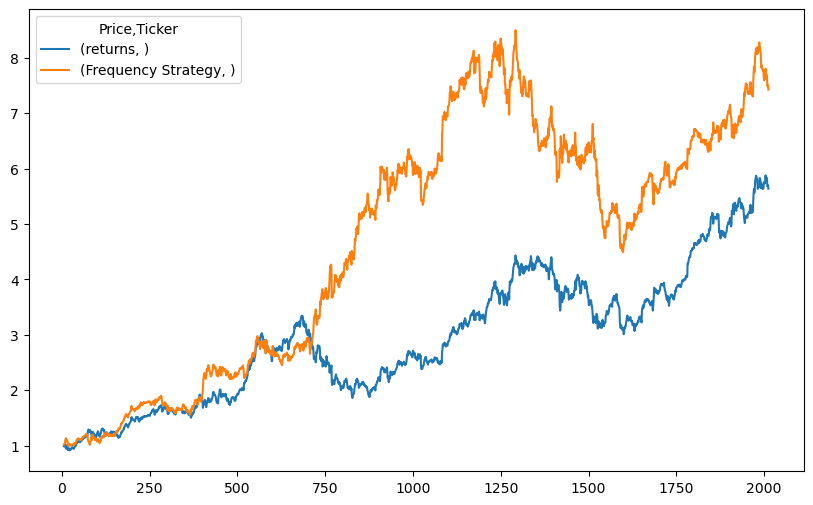

In [938]:
data[['returns', 'Frequency Strategy']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6));
#Given the frequency data, three feature value combinations hint at a downward
#movement while one lets an upward movement seem more likely.

<b> Even for the 2018-2024 period, the strategy continues to outperform market returns. </b>

<b> This section applies the classification algorithms from ML to the problem of predicting the direction of price </b>

<b> Using Logistic Regression, Gaussian Naive Bayes and Support Vector Classifier </b>

<b> Analysis for 2010-2018 period </b>

In [942]:

from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C = 1



In [944]:
data = yf.download("AAPL", start="2010-01-01", end="2018-01-01")
data=data.reset_index()
data=pd.DataFrame(data[['Date','Adj Close','Close','High',	'Low','Open','Volume']])

[*********************100%***********************]  1 of 1 completed


<Axes: >

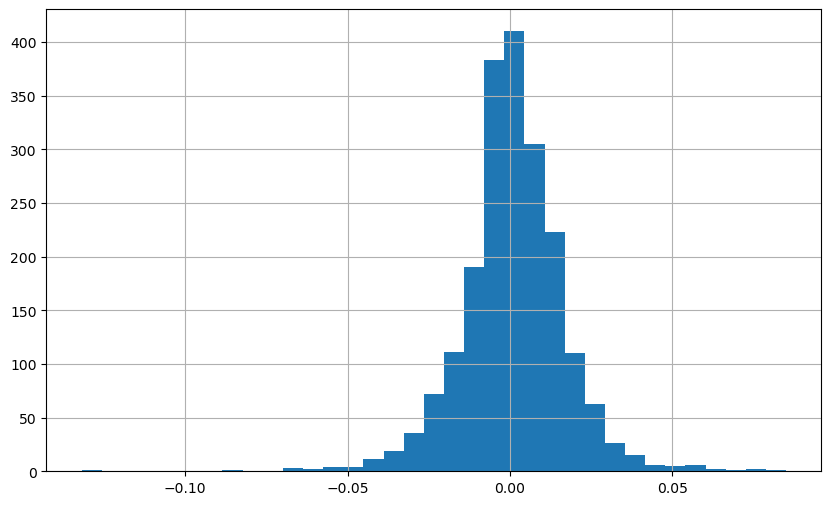

In [946]:
data['returns']=np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
data['direction']=np.sign(data['returns']).astype(int)
data['returns'].hist(bins=35, figsize=(10, 6))

In [948]:
#creating the features data by lagging the log returns and visualizes it in combination
lags=5
def create_lags(data):
    global cols
    cols= []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [950]:
create_lags(data)

In [952]:
def create_bins(data, bins=[0]): #creating bins
 global cols_bin
 cols_bin = []
 for col in cols:
     col_bin = col + '_bin'
     data[col_bin] = np.digitize(data[col], bins=bins) #digitizes
     cols_bin.append(col_bin)

In [954]:
create_bins(data)

In [956]:
split = int(len(data) * 0.7) #sequential spit

In [958]:
train = data.iloc[:split].copy() 

In [960]:
test = data.iloc[split:].copy()

In [962]:
models = {
 'log_reg': linear_model.LogisticRegression(C=C),
 'gauss_nb': GaussianNB(),
 'svm': SVC(C=C)
 }

In [964]:
def fit_models(data):
 mfit = {model: models[model].fit(data[cols_bin],
 data['direction'])
 for model in models.keys()}

In [966]:
def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])


In [968]:
def evaluate_strats(data):
 global sel
 sel = []
 for model in models.keys():
     col = 'strat_' + model
     data[col] = data['pos_' + model] * data['returns']
     sel.append(col)
     sel.insert(0, 'returns')


In [970]:
sel

['returns', 'strat_log_reg', 'strat_gauss_nb', 'strat_svm']

In [972]:
fit_models(train) 

In [974]:
derive_positions(test) 

In [976]:
evaluate_strats(test)

In [978]:
sel = sel[:1] + sel[3:]

In [980]:
test[sel].sum().apply(np.exp)

Price           Ticker
returns                   1.464941
strat_log_reg             1.575770
strat_gauss_nb            1.574762
strat_svm                 1.098144
dtype: float64

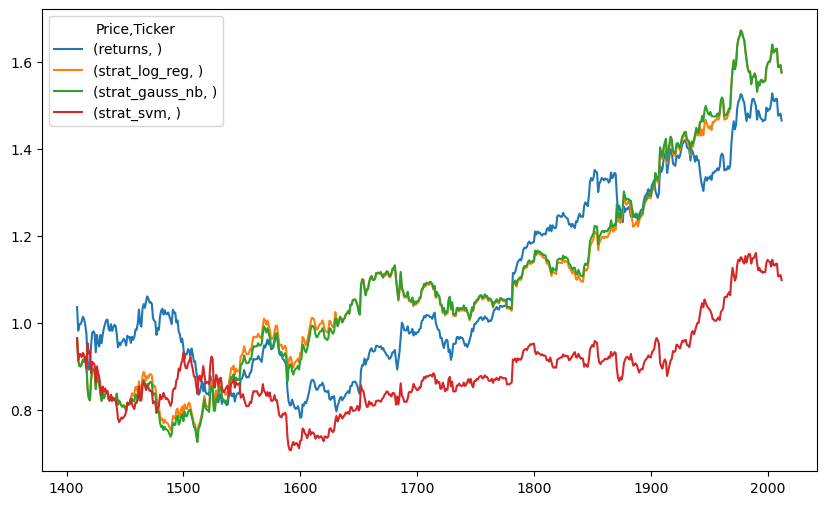

In [982]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));


<b> Logistic Regression and Gaussian Naive Bayes (NB) outperform market returns while 
Support Vector Machines (SVM) fails to do so for Apple stock data (2010-2018) </b>

<b> Analysis for 2018-2024 time period </b>

In [987]:
data = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
data=data.reset_index()
data=pd.DataFrame(data[['Date','Adj Close','Close','High',	'Low','Open','Volume']])

[*********************100%***********************]  1 of 1 completed


<Axes: >

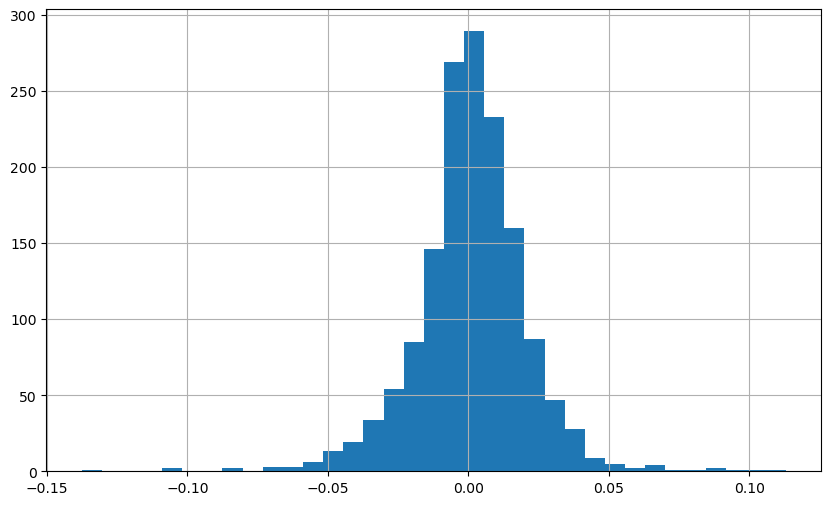

In [989]:
data['returns']=np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
data['direction']=np.sign(data['returns']).astype(int)
data['returns'].hist(bins=35, figsize=(10, 6))

In [991]:
#creating the features data by lagging the log returns and visualizes it in combination
lags=5
def create_lags(data):
    global cols
    cols= []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [993]:
create_lags(data)

In [995]:
def create_bins(data, bins=[0]): #creating bins
 global cols_bin
 cols_bin = []
 for col in cols:
     col_bin = col + '_bin'
     data[col_bin] = np.digitize(data[col], bins=bins) #digitizes
     cols_bin.append(col_bin)

In [997]:
create_bins(data)

In [999]:
split = int(len(data) * 0.7) #sequential spit

In [1001]:
train = data.iloc[:split].copy() 

In [1003]:
test = data.iloc[split:].copy()

In [1005]:
fit_models(train) 

In [1007]:
derive_positions(test) 

In [1009]:
evaluate_strats(test)

In [1011]:
sel = sel[:1] + sel[3:]

In [1013]:
test[sel].sum().apply(np.exp)

Price           Ticker
returns                   1.244297
strat_log_reg             0.996903
strat_gauss_nb            1.001524
strat_svm                 1.396443
dtype: float64

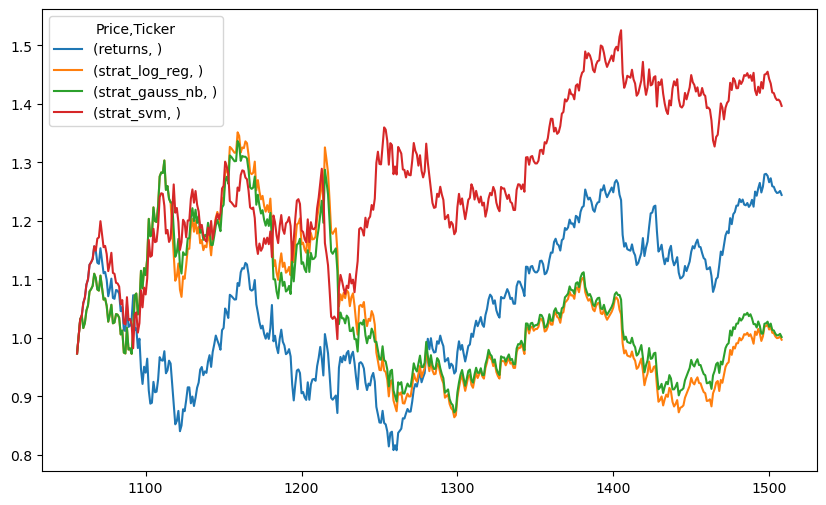

In [1015]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

<b>For 2018-2024, SVM performs better than the Market Returns and Logistic Regression and Gaussian NB fail in doing so. </b>

<b> Additional Analysis </b>

<b> Performing Sentiment Analysis on the data, and forming a strategy based on the sentiment score </b>

<b> using data from newsapi, performing analysis on 1 month of data </b>

{'status': 'ok', 'totalResults': 1830, 'articles': [{'source': {'id': None, 'name': 'Yahoo Entertainment'}, 'author': 'Amy Skorheim', 'title': 'Black Friday Apple deals 2024: The best Apple sales on iPads, AirPods, Apple Watches and MacBooks', 'description': 'Apple devices have a few things in common: they’re well-designed, solidly built and easily connect with one another. But chances are, if it bears the Apple logo, it’s not cheap. That’s why promos like Black Friday are always worth checking out if you’re in th…', 'url': 'https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_5b50f93c-f2e5-4f39-87c2-8667512a5599', 'urlToImage': None, 'publishedAt': '2024-11-19T16:51:43Z', 'content': "If you click 'Accept all', we and our partners, including 237 who are part of the IAB Transparency &amp; Consent Framework, will also store and/or access information on a device (in other words, use … [+678 chars]"}, {'source': {'id': None, 'name': 'Gizmodo.com'}, 'author': 'Gizmodo Deals', 

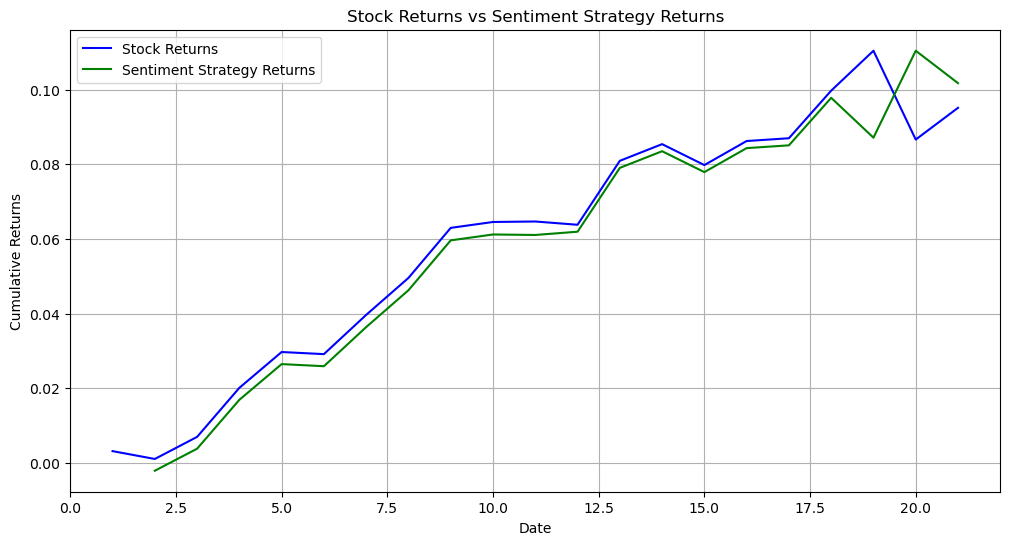

In [668]:
#testing sentiment analysis
import yfinance as yf
import pandas as pd
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

# Initialize NewsAPI (replace with your own API key)
newsapi = NewsApiClient(api_key='a98e7366c08044e4b0794551ee8e2317')

# Fetch stock data (Apple)
stock = yf.Ticker("AAPL")
stock_data = stock.history(period="1mo")  # 1 year data

# Fetch news articles related to Apple
# Fetch articles without processing sentiment yet
def get_news(query="Apple", language="en", page_size=100):
    all_articles = newsapi.get_everything(q=query,from_param='2024-19-12',to='2024-19-12',
                                          language=language,
                                          page_size=page_size)
    # Print the entire response to check the data
    print(all_articles)
    return all_articles['articles']

news_data = get_news(query="Apple stock")
# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(news_data):
    sentiment_scores = []
    for article in news_data:
        text = article['title'] + " " + article['description']  # Combine title and description
        sentiment = sia.polarity_scores(text)  # VADER sentiment analysis
        sentiment_scores.append(sentiment['compound'])  # Extract compound score
    return sentiment_scores

sentiment_scores = analyze_sentiment(news_data)
news_data_df = pd.DataFrame(news_data)
news_data_df['sentiment'] = sentiment_scores

# Ensure the 'sentiment' column is numeric and fill NaNs with 0 (neutral sentiment)
news_data_df['sentiment'] = pd.to_numeric(news_data_df['sentiment'], errors='coerce')
#remove nulls
news_data_df['sentiment'] = news_data_df['sentiment'].fillna(0)
# Convert 'publishedAt' to datetime and set it as the index
news_data_df['publishedAt'] = pd.to_datetime(news_data_df['publishedAt'])
news_data_df.set_index('publishedAt', inplace=True)

# Resample news sentiment data to daily frequency and compute the mean
sentiment_data_resampled = news_data_df['sentiment'].resample('D').mean()

#format resampled data
sentiment_data_resampled=sentiment_data_resampled.to_frame()
sentiment_data_resampled=sentiment_data_resampled.reset_index()
sentiment_data_resampled.rename(columns={'publishedAt': 'Dates'}, inplace=True)
sentiment_data_resampled['Day']=pd.to_datetime(sentiment_data_resampled['Dates']).dt.date

#format stock data to merge with resampled sentiment data
stock_data=stock_data.reset_index()
stock_data['Day'] =pd.to_datetime(stock_data['Date']).dt.date

stock_data = stock_data.merge(sentiment_data_resampled, how='left',on='Day')


#Apply sentiment strategy
stock_data['strategy'] = np.where(stock_data['sentiment'] > 0, 1, -1)

# Calculate stock returns and strategy returns
stock_data['daily_return'] = stock_data['Close'].pct_change()

# Ensure no NaN values in the 'daily_return' column before calculating cumulative returns
stock_data = stock_data.dropna(subset=['daily_return'])

# Calculate cumulative returns
stock_data['cumulative_stock_return'] = (1 + stock_data['daily_return']).cumprod() - 1
stock_data['strategy_return'] = stock_data['strategy'].shift(1) * stock_data['daily_return']

# Calculate cumulative strategy returns
stock_data['cumulative_strategy_return'] = (1 + stock_data['strategy_return']).cumprod() - 1

# Plot cumulative returns of strategy vs stock
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['cumulative_stock_return'], label='Stock Returns', color='blue')
plt.plot(stock_data.index, stock_data['cumulative_strategy_return'], label='Sentiment Strategy Returns', color='green')
plt.title('Stock Returns vs Sentiment Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

    


In [670]:
stock_data[['cumulative_strategy_return', 'cumulative_stock_return']].sum().apply(np.exp)

cumulative_strategy_return    3.333689
cumulative_stock_return       3.477219
dtype: float64